# Stock Market Prediction

In [186]:
# Import dependencies
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [187]:
# Read data
df = pd.read_csv('data/Combined_News_DJIA.csv', parse_dates=True, index_col=0)

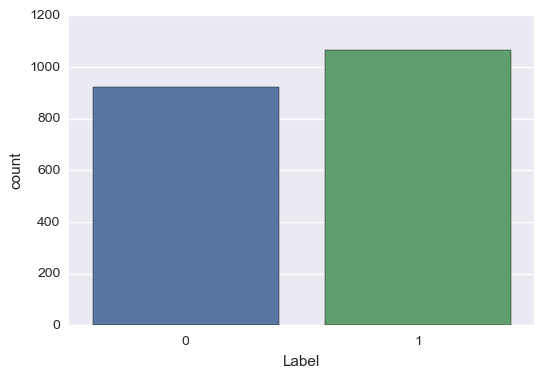

In [188]:
# Plot class distribution
sns.countplot(x='Label', data=df)

In [189]:
# Check the data
df.head()

,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',"b""The commander of a Navy air reconnaissance s...",...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'S

In [213]:
# Select only the top N news to use as features of the classifier. N ranges from 1 to 25.
# In this case, N = 20. 
columns = ['Top' + str(i+1) for i in range(20)]
print columns



['Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7', 'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15', 'Top16', 'Top17', 'Top18', 'Top19', 'Top20']


In [214]:
# Create a new column with the Top N news joined.
df['joined'] = df[columns].apply(lambda x: ' '.join(x.astype(str)), axis=1)

In [215]:
# Create a new dataframe with only Label and joined columns
df1 = df[['Label', 'joined']].copy()

In [216]:
# Take a look
df1.head()

,Label,joined
Date,,
2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou..."
2008-08-11,1,b'Why wont America and Nato help us? If they w...
2008-08-12,0,b'Remember that adorable 9-year-old who sang a...
2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...
2008-08-14,1,b'All the experts admit that we should legalis...


In [217]:
# According to the author of the dataset, the data should be split as it:
# Train set: from 2008-08-08 to 2014-12-31 
# Test set: from 2015-01-02 to 2016-07-01

train = df1.ix['2008-08-08':'2014-12-31'].shape
test = df1.ix['2015-01-02':'2016-07-01'].shape

print train
print test

(1611, 2)
(378, 2)


In [218]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [219]:
# Create a tfidf object. Remove english stop words and use 10000 features.
vect = TfidfVectorizer(max_features=10000, stop_words='english')

In [220]:
# Transform the joined column into a tfidf sparse matrix
X = vect.fit_transform(df1['joined'])

In [221]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

In [222]:
# Use tfidf followed by svd is known as lsa or lsi.
svd = TruncatedSVD(1000)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)


In [223]:
# Apply lsa
X = lsa.fit_transform(X)

In [224]:
# Split data into train and test
X_train = X[:1611]
print X_train.shape
X_test = X[1611:]
print X_test.shape


(1611, 1000)
(378, 1000)


In [225]:
# Get labels
y_train = df1['Label'].ix['2008-08-08':'2014-12-31']
y_test = df1['Label'].ix['2015-01-02':'2016-07-01']

In [226]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

In [227]:
# Create for different classifiers. Random Forest, KNN, Support Vector Machine and an Ensemble of these 3.
rf = RandomForestClassifier()
knn = KNeighborsClassifier(n_neighbors=3)
svm = LinearSVC()
vc = VotingClassifier(estimators=[('rf',rf), ('knn',knn), ('svm',svm)])

In [228]:
# Train them
rf.fit(X_train,y_train)
knn.fit(X_train,y_train)
svm.fit(X_train,y_train)
vc.fit(X_train,y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))],
         n_jobs=1, voting='hard', weights=None)

In [229]:
# Check the accuracies

ac_rf = rf.score(X_test, y_test)
ac_knn = knn.score(X_test, y_test)
ac_svm = svm.score(X_test, y_test)
ac_vc = vc.score(X_test, y_test)

print "Accuracy rf is", ac_rf
print "Accuracy knn is", ac_knn
print "Accuracy svm is", ac_svm
print "Accuracy vc is", ac_vc

Accuracy rf is 0.497354497354
Accuracy knn is 0.529100529101
Accuracy svm is 0.468253968254
Accuracy vc is 0.515873015873


# Conclusion

The low accuracy achieved with the experiments indicates that probably there is no correlation between Reddit's Top News and Dow Jones index. Maybe a more complex model can find an underlying pattern. However there are too few data to try deep learning. 